In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
turkiye_df= pd.read_excel("bestscorer.xlsx")

In [87]:
turkiye_df

,Rank,Player Name,Team,Points,Attack Points,Block Points,Serve Points
0,1,Vargas,TUR,159,145,8,6
1,2,Egonu,ITA,110,95,8,7
2,2,Gabi,BRA,110,97,11,2
3,3,Bošković,SRB,103,93,5,5
4,4,Drews,USA,97,90,5,2
...,...,...,...,...,...,...,...
144,52,Giardino,FRA,0,0,0,0
145,52,Popović S.,SRB,0,0,0,0
146,52,Respaut,FRA,0,0,0,0
147,52,Spirito,ITA,0,0,0,0


In [88]:
df_volleyboll = turkiye_df[turkiye_df["Team"] == "TUR"].reset_index(drop=True)

In [89]:
df_volleyboll

,Rank,Player Name,Team,Points,Attack Points,Block Points,Serve Points
0,1,Vargas,TUR,159,145,8,6
1,11,Erdem,TUR,58,42,14,2
2,17,Baladın,TUR,46,37,5,4
3,25,Cebecioğlu,TUR,33,29,1,3
4,29,Güneş,TUR,26,12,11,3
5,31,Karakurt,TUR,24,20,1,3
6,33,Diken,TUR,21,17,3,1
7,36,E. Şahin,TUR,18,10,5,3
8,40,Kalaç,TUR,13,6,5,2
9,41,Aydın,TUR,12,12,0,0


In [90]:
df_volleyboll = df_volleyboll.assign(Rank=lambda x:x.index + 1)

In [91]:
df_volleyboll

,Rank,Player Name,Team,Points,Attack Points,Block Points,Serve Points
0,1,Vargas,TUR,159,145,8,6
1,2,Erdem,TUR,58,42,14,2
2,3,Baladın,TUR,46,37,5,4
3,4,Cebecioğlu,TUR,33,29,1,3
4,5,Güneş,TUR,26,12,11,3
5,6,Karakurt,TUR,24,20,1,3
6,7,Diken,TUR,21,17,3,1
7,8,E. Şahin,TUR,18,10,5,3
8,9,Kalaç,TUR,13,6,5,2
9,10,Aydın,TUR,12,12,0,0


In [92]:
positions = {"Vargas" : "Opposite Spiker", "Erdem" : "Middle Blocker", "Baladın" : "Outside Hitter",
             "Cebecioğlu" : "Outside Hitter", "Güneş" : "Middle Blocker", "Karakurt" : "Outside Hitter",
             "Diken" : "Outside Hitter", "E. Şahin" : "Setter" , "Kalaç" : "Middle Blocker", 
             "Aydın" : "Outside Hitter", "Özbay" : "Setter", "Örge" : "Libero", "Arıcı" : "+1"}

In [93]:
df_volleyboll["Position"] = df_volleyboll["Player Name"].map(positions)

In [94]:
df_volleyboll

,Rank,Player Name,Team,Points,Attack Points,Block Points,Serve Points,Position
0,1,Vargas,TUR,159,145,8,6,Opposite Spiker
1,2,Erdem,TUR,58,42,14,2,Middle Blocker
2,3,Baladın,TUR,46,37,5,4,Outside Hitter
3,4,Cebecioğlu,TUR,33,29,1,3,Outside Hitter
4,5,Güneş,TUR,26,12,11,3,Middle Blocker
5,6,Karakurt,TUR,24,20,1,3,Outside Hitter
6,7,Diken,TUR,21,17,3,1,Outside Hitter
7,8,E. Şahin,TUR,18,10,5,3,Setter
8,9,Kalaç,TUR,13,6,5,2,Middle Blocker
9,10,Aydın,TUR,12,12,0,0,Outside Hitter


In [95]:
player_totals = df_volleyboll.groupby("Player Name")[["Points","Attack Points","Block Points","Serve Points"]].sum()

In [96]:
player_totals.sort_values(["Points","Attack Points","Block Points","Serve Points"],ascending=False)

,Points,Attack Points,Block Points,Serve Points
Player Name,,,,
Vargas,159,145,8,6
Erdem,58,42,14,2
Baladın,46,37,5,4
Cebecioğlu,33,29,1,3
Güneş,26,12,11,3
Karakurt,24,20,1,3
Diken,21,17,3,1
E. Şahin,18,10,5,3
Kalaç,13,6,5,2


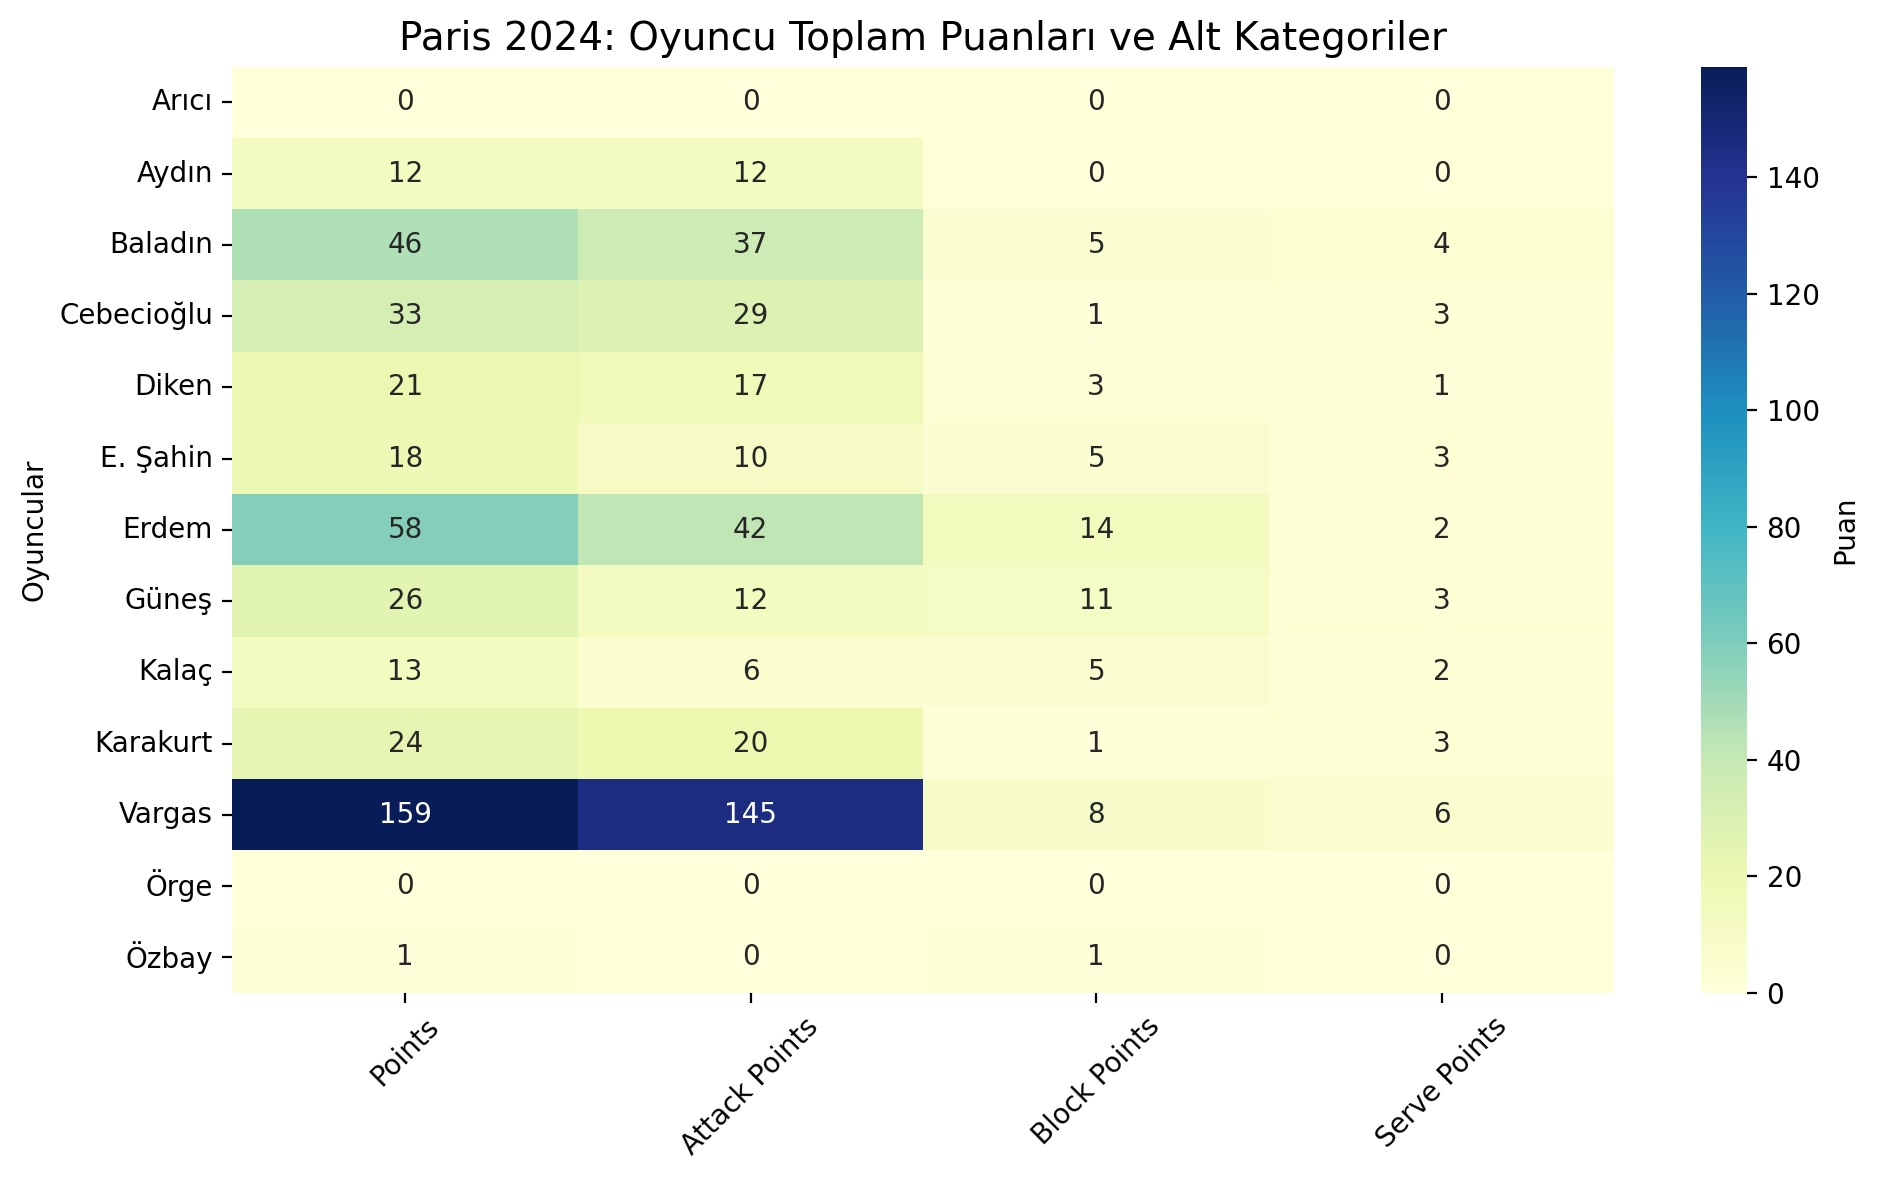

In [97]:
# Sadece sayısal sütunları al
heatmap_data = player_totals[["Points","Attack Points","Block Points","Serve Points"]]
plt.figure(figsize=(10,6), dpi=200)
sns.heatmap(heatmap_data, 
    annot=True,        # hücre değerlerini göster      
    fmt=".0f", # tam sayı formatı
    cmap="YlGnBu",     # sarı-yeşil-mavi tonları
    cbar_kws={'label': 'Puan'}  # renk çubuğu etiketi
)

plt.title("Paris 2024: Oyuncu Toplam Puanları ve Alt Kategoriler", fontsize=14)
plt.ylabel("Oyuncular")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

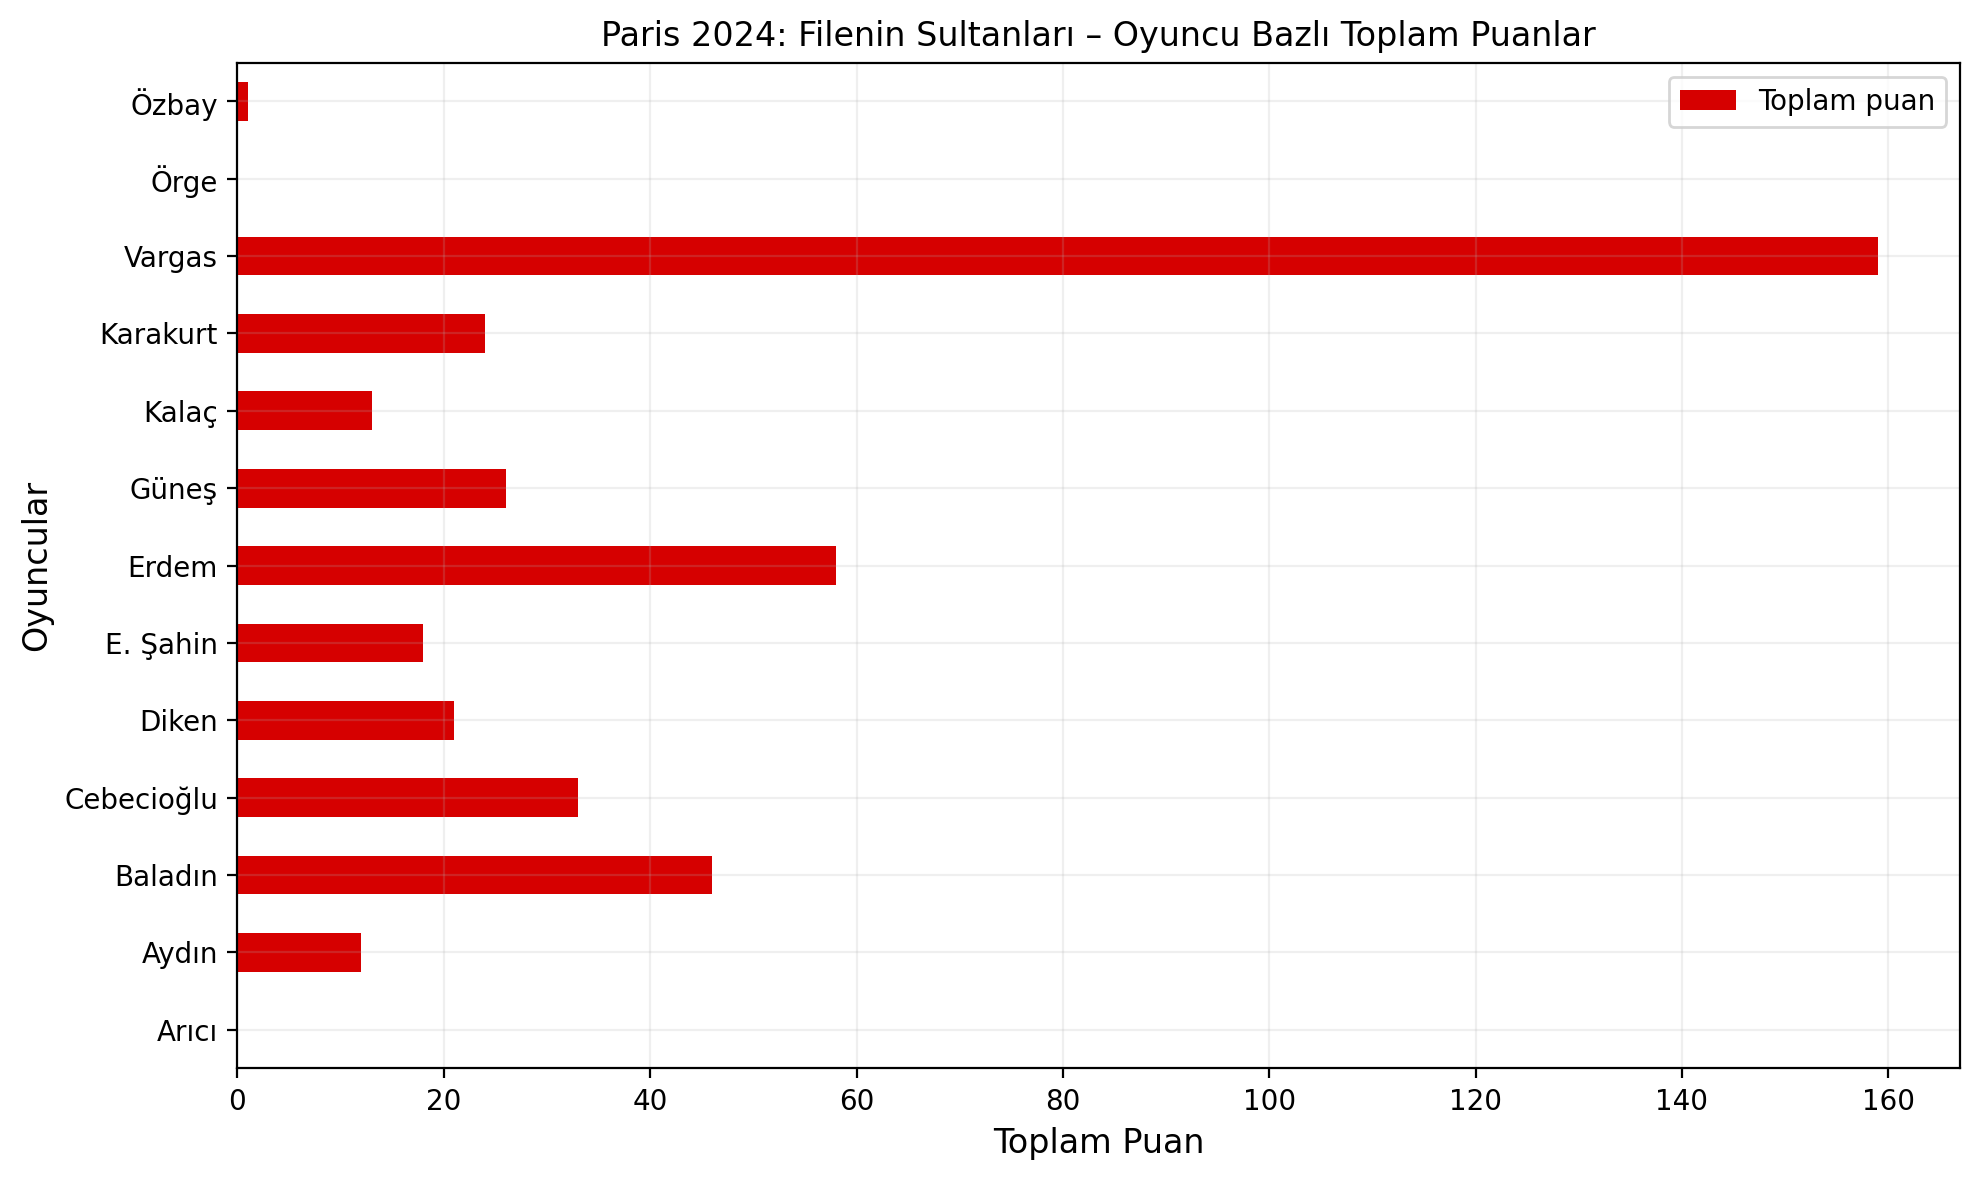

In [98]:
y = df_volleyboll.groupby("Player Name")["Points"].sum()
plt.figure(figsize=(10,6),dpi=200)
y.plot(kind="barh",color="#d60000",label="Toplam puan",)

plt.title("Paris 2024: Filenin Sultanları – Oyuncu Bazlı Toplam Puanlar")
plt.xlabel("Toplam Puan",fontsize=12)
plt.ylabel("Oyuncular",fontsize=12)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.legend()
plt.show()

<Figure size 1280x960 with 0 Axes>

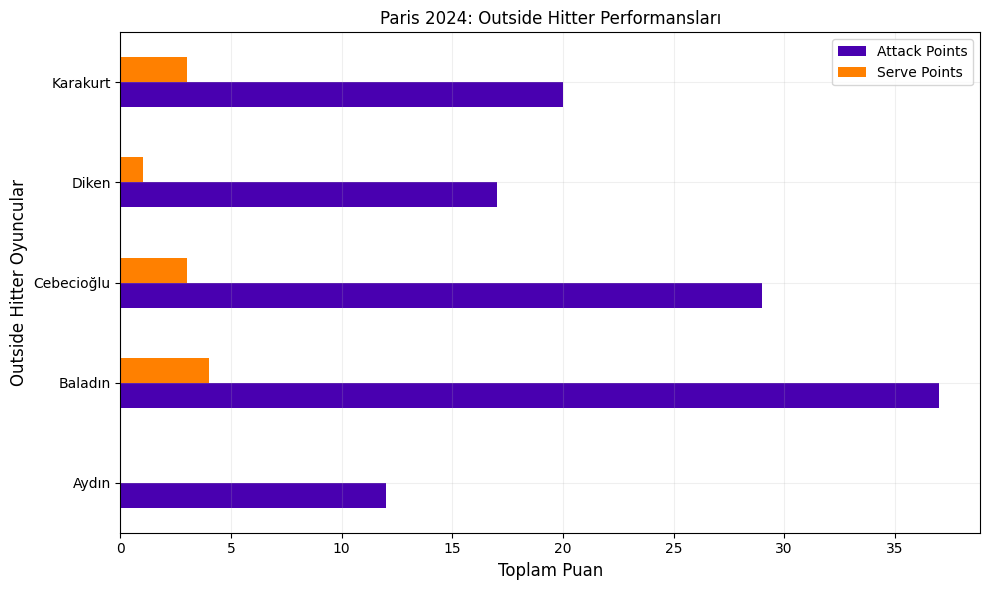

In [99]:
# outside hitterları kendi aralarında değerlendirelim.
outside_hitters = df_volleyboll[df_volleyboll["Position"] == "Outside Hitter"]
outside_totals = outside_hitters.groupby("Player Name")[["Attack Points","Serve Points"]].sum()
plt.figure(dpi=200)
outside_totals.plot(
    kind="barh",
    stacked=False,   # attack ve serve ayrı ayrı görünsün
    figsize=(10,6),
    color=["#4900B0","#FF8000"]  
)

plt.xlabel("Toplam Puan",fontsize=12)
plt.ylabel("Outside Hitter Oyuncular",fontsize=12)
plt.title("Paris 2024: Outside Hitter Performansları")
plt.grid(alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1280x960 with 0 Axes>

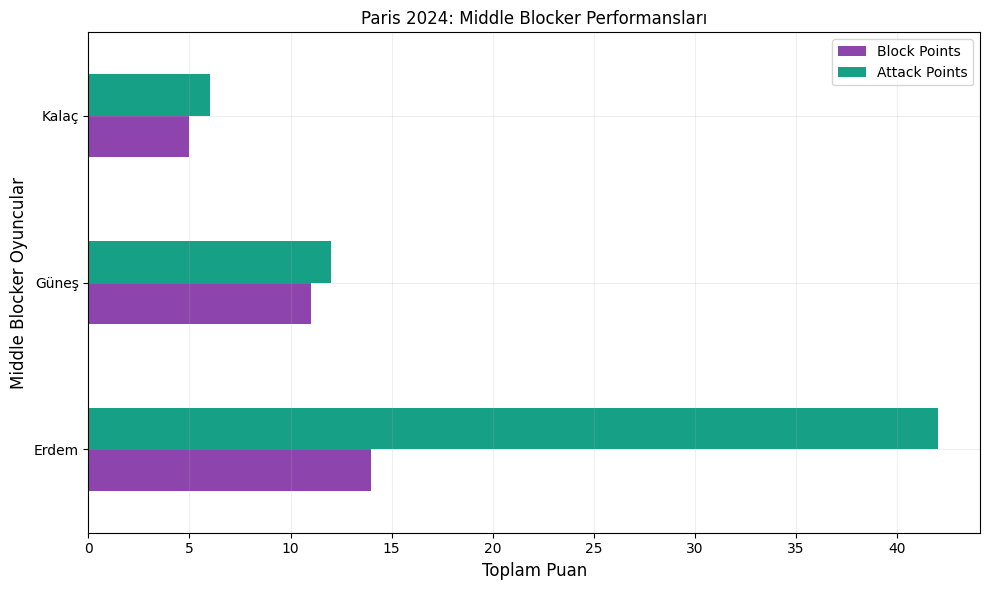

In [100]:
# middle blocker için kendi aralarında değerlendirelim.
middle_blocker = df_volleyboll[df_volleyboll["Position"] == "Middle Blocker"]
middle_blocker_totals = middle_blocker.groupby("Player Name")[["Block Points","Attack Points"]].sum()
plt.figure(dpi=200)
middle_blocker_totals.plot(
    kind="barh",
    stacked=False,   # attack ve block ayrı ayrı görünsün
    figsize=(10,6),
    color=["#8E44AD","#16A085"]  
)

plt.xlabel("Toplam Puan",fontsize=12)
plt.ylabel("Middle Blocker Oyuncular",fontsize=12)
plt.title("Paris 2024: Middle Blocker Performansları")
plt.grid(alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1280x960 with 0 Axes>

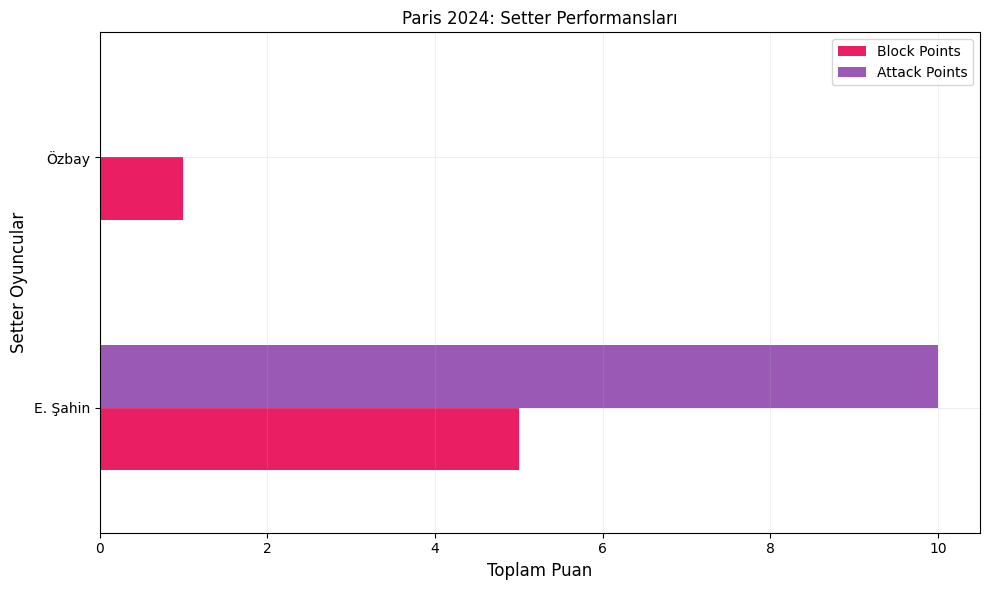

In [101]:
# middle blocker için kendi aralarında değerlendirelim.
outside_hitters = df_volleyboll[df_volleyboll["Position"] == "Setter"]
outside_totals = outside_hitters.groupby("Player Name")[["Block Points","Attack Points"]].sum()
plt.figure(dpi=200)
outside_totals.plot(
    kind="barh",
    stacked=False,   # attack ve block ayrı ayrı görünsün
    figsize=(10,6),
    color=["#E91E63","#9B59B6"]  
)

plt.xlabel("Toplam Puan",fontsize=12)
plt.ylabel("Setter Oyuncular",fontsize=12)
plt.title("Paris 2024: Setter Performansları")
plt.grid(alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()